1-й закон Кеплера
    Планеты Солнечной системы движутся по эллиптическим орбитам. В одном из фокусов такой орбиты находится Солнце.
Интерполяция 
    В вычислительной математике способ нахождения промежуточных значений величины по имеющемуся дискретному набору известных значений.

С помощью метода наименьших квадратов я должна была найти коэффициенты для уравнения 𝑧=𝑎𝑥^2+𝑏𝑥𝑦+𝑐𝑦^2+𝑑𝑥+𝑒𝑦+𝑓. Так как это уравнение необходимо для нахождения кривой второго порядка, то z=0 и a=1. Тогда уравнение меняется:
  b*x*y + c*y^2 + d*x + e*y + f = -(𝑥^2). 
О методе наименьших квадратов: (теория)
Данный метод используется для нахождения максимально близких графиков по нескольким точкам. Для этого необходимо найти коэффициенты при x и y, и ошибка (в моем случае f). 
В методе наименьших квадратов есть такое понятие, как ошибка прогноза (оп). Если мы будем из y (фактическое) вычитать y(по прогнозу), то мы получим разницу. Это и есть оп для одной переменной. Что-бы получить оп по всему уравнению необходимо ссумировать все ошибки. Но если мы их не возведдем в квадрат, то они могут компенсировать друг друга (одна ошибка с +, другя с -).Собственно поэтому и необходимо возводить в квадрат.

Вернемся к поиску коэффициентов для нашего уравнения:

In [11]:
from numpy import linalg
from numpy import linspace
from numpy import meshgrid
import numpy as np
import matplotlib.pyplot as plt #Для отрисовки
from sympy import * #Для символьных имен
import math

x = np.array([1.02, .95, .87, .77, .67, .56, .44, .30, .16, .01])
y = np.array([0.39, .32, .27, .22, .18, .15, .13, .12, .13, .15])

b = [i ** 2 for i in x] # Это список, который содержит результаты, 
                        #которые даны как x ^ 2 из уравнения.

def fxn(x, y):  # Это функция, которая решает данное уравнение, 
                #чтобы найти каждый параметр
    my_list = [] #Это основной список
    for z in range(len(x)):
        w = [0] * 5
        w[0] = y[z] ** 2
        w[1] = x[z] * y[z]
        w[2] = x[z]
        w[3] = y[z]
        w[4] = 1
        my_list.append(w) # Добавляет элемент в конец списка
        
    return my_list

t = linalg.lstsq(fxn(x, y), b) #Решает начальное уравнение
print(t[0][1], "xy+",t[0][0],"y^2+",t[0][2],"x+",t[0][3],"y+",t[0][4], "=0")



0.14364618259889303 xy+ -2.6356254837121007 y^2+ 0.5514469631403579 x+ 3.2229403381058948 y+ -0.4328942702644502 =0


C:\Users\diana\anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Коэффициенты для уравнения найдены. Теперь нунеобходимо отрисовать функцию.

(-b*x - d + sqrt(-4*a*c*x - 4*a*e + 4*a*x**2 + b**2*x**2 + 2*b*d*x + d**2))/(2*a)


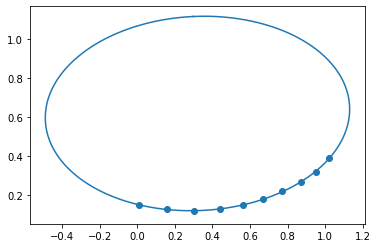

In [33]:
def yolv(coeffs):
    x,y,a,b,c,d,e = symbols('x y a b c d e')
    ellipse = a*y**2 + b*x*y + c*x + d*y + e - x**2
    y_sols = solve(ellipse, y)
    print(y_sols[0])

    num_coefs = [(a, f) for a, f in (zip([a,b,c,d,e], coeffs))]
    y_solsf0 = y_sols[0].subs(num_coefs)
    y_solsf1 = y_sols[1].subs(num_coefs)

    f0 = lambdify([x], y_solsf0)
    f1 = lambdify([x], y_solsf1)
    return f0, f1

f0, f1 = yolv(t[0])


def computeEllipse(a, b, c, d, e):
    """
    Возвращает массив x-y для координат эллипса.
    Уравнение имеет вид a * y ** 2 + b * x * y + c * x + d * y + e = x ** 2
    """
    # Преобразовать координату x ** 2 в +1
    a = -a
    b = -b
    c = -c
    d = -d
    e = -e
    # Rotation angle
    theta = 0.5 * math.atan(b / (1 - a))
    # Угол поворота
    sin = math.sin(theta)
    cos = math.cos(theta)
    aa = cos**2 + b * sin * cos + a * sin**2
    bb = sin**2 - b * cos * sin + a * cos**2
    cc = c * cos + d * sin
    dd = -c * sin + d * cos
    ee = e
    # Стандартная форма
    axMaj = 1 / math.sqrt(aa)
    axMin = 1 / math.sqrt(bb)
    scale = math.sqrt(cc**2 / (4 * aa) + dd**2 / (4 * bb) - ee)
    h = -cc / (2 * aa)
    k = -dd / (2 * bb)
    # Параметризованное уравнение
    t = np.linspace(0, 2 * math.pi, 1000)
    xx = h + axMaj * scale * np.sin(t)
    yy = k + axMin * scale * np.cos(t)
    # Не повернутые координаты
    x = xx * cos - yy * sin
    y = xx * sin + yy * cos
    return x, y
#a * y ** 2 + b * x * y + c * x + d * y + e = x ** 2
a = t[0][0]
b = t[0][1]
c = t[0][2]
d = t[0][3]
e = t[0][4]
lines = plt.plot(*computeEllipse(a, b, c, d, e)) 

plt.scatter(x, y)
plt.show()

Добавляем возмущения

0.35607227176305756 xy+ -2.1586363143320244 y^2+ 0.5098341017944684 x+ 2.7944159457309405 y+ -0.37495487818024187 =0


C:\Users\diana\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


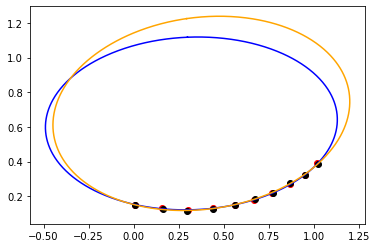

In [83]:
import random
xx = np.array([1.02+random.uniform(-0.005,0.005), .95+random.uniform(-0.005,0.005), .87+random.uniform(-0.005,0.005), .77+random.uniform(-0.005,0.005), .67+random.uniform(-0.005,0.005), .56+random.uniform(-0.005,0.005), .44+random.uniform(-0.005,0.005), .30+random.uniform(-0.005,0.005), .16+random.uniform(-0.005,0.005), .01+random.uniform(-0.005,0.005)])
yy = np.array([0.39+random.uniform(-0.005,0.005), .32+random.uniform(-0.005,0.005), .27+random.uniform(-0.005,0.005), .22+random.uniform(-0.005,0.005), .18+random.uniform(-0.005,0.005), .15+random.uniform(-0.005,0.005), .13+random.uniform(-0.005,0.005), .12+random.uniform(-0.005,0.005), .13+random.uniform(-0.005,0.005), .15+random.uniform(-0.005,0.005)])

bb = [i ** 2 for i in x] # Это список, который содержит результаты, 
                        #которые даны как x ^ 2 из уравнения.

tt = linalg.lstsq(fxn(xx, yy), bb) #Решает начальное уравнение
print(tt[0][1], "xy+",tt[0][0],"y^2+",tt[0][2],"x+",tt[0][3],"y+",tt[0][4], "=0")

a = t[0][0]
b = t[0][1]
c = t[0][2]
d = t[0][3]
e = t[0][4]

lines = plt.plot(*computeEllipse(a, b, c, d, e), color='blue') 
a = tt[0][0]
b = tt[0][1]
c = tt[0][2]
d = tt[0][3]
e = tt[0][4]

lines = plt.plot(*computeEllipse(a, b, c, d, e), color='orange', )
plt.scatter(x, y, color='red')
plt.scatter(xx, yy, color='black')
plt.show()

При нескольких запусках предыдущего блока можно увидеть совершенно разные результаты. Орбиты могут быть очень близки друг к другу, а могут координально отлтчаться. Давайте посчитаем разницу. 

In [75]:
rasn=np.array([t[0][0]-tt[0][0], t[0][1]-tt[0][1], t[0][2]-tt[0][2], t[0][3]-tt[0][3],t[0][4]-tt[0][4]])
print (rasn)

[-1.41214261  0.52427934 -0.07725171  0.23779215 -0.00923942]


При нескольких запусках я смогла сделать вывод:
<br/> Если разница 1х коэффициентов близка к +-1 (или больше),  
то орбиты имеют очень сильные различия

Почему коэффициенты отличаются?  
<br/> Дело в том, что хоть разница и не большая, но при расчетах эта разница возводится в квадрат, суммируется результат заносят под корень. В таком случае, какое-то даже небольшое отклонение приведет к другому результату.